In [0]:
!curl https://raw.githubusercontent.com/prathameshmhabdi/Keras-SRGAN/master/model/gen_model3000.h5 -O 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.8M  100 23.8M    0     0  21.2M      0  0:00:01  0:00:01 --:--:-- 21.2M


In [0]:
# !mkdir frames_lr
import cv2 
# from google.colab import drive
# drive.mount('/content/gdrive')
def FrameCapture(path): 
	# 
	# Path to video file 
	vidObj = cv2.VideoCapture(path) 
# 
	# Used as counter variable 
	count = 0
# 
	# checks whether frames were extracted 
	success = 1
# 
	while (count<2000): 
# 
		# vidObj object calls read 
		# function extract frames 
		success, image = vidObj.read() 
# 
		# Saves the frames with frame-count 
		cv2.imwrite("./frames_lr/frame%d.jpg" % count, image) 
# 
		count += 1
# 
# Driver Code 

	# Calling the function 
# FrameCapture("./drive/My Drive/I.mp4") 
# 
img = cv2.imread("./frames_lr/frame0.jpg")
img.shape

(360, 640, 3)

In [0]:
!curl https://raw.githubusercontent.com/prathameshmhabdi/Keras-SRGAN/master/data_hr/hr.jpg -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44848  100 44848    0     0   171k      0 --:--:-- --:--:-- --:--:--  171k


In [0]:
!curl https://raw.githubusercontent.com/prathameshmhabdi/Keras-SRGAN/master/Utils_model.py -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1092  100  1092    0     0   7856      0 --:--:-- --:--:-- --:--:--  7856


In [0]:
%tensorflow_version 1.14
import tensorflow as tf
tf.__version__



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'2.1.0'

In [0]:
%tensorflow_version 1.x
import keras
import numpy as np
import cv2
from Utils_model import VGG_LOSS

def change_model(model,new_shape=(None,240,426,3)):
    model._layers[0].batch_input_shape=new_shape
    new_model=keras.models.model_from_json(model.to_json())
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("loaded layer {}".format(layer.name))
        except:
            print("could not {}".format(layer.name))


    return new_model

def upscale():
    loss = VGG_LOSS((384,384,3))  
    model = keras.models.load_model( 'gen_model3000.h5', custom_objects={'vgg_loss': loss.vgg_loss})
    # # print(model.summary())
    # inputs = keras.Input((384, 384, 3))

    # # Trace out the graph using the input:
    # outputs = model(inputs)

    # # Override the model:
    # # model = keras.model.Model(inputs, outputs)
    # model = keras.models.Model(inputs,outputs)
    # print(model.summary())
    img=cv2.imread("lr.jpg")
    img=(img.astype(np.float32) - 127.5)/127.5 
    output=model.predict(np.expand_dims(img, axis=0))
    # print(output)
    output=output[0]
    print(output.shape)

    output= (output + 1) * 127.5
    output= output.astype(np.uint8)
    # print(output)
    cv2.imwrite("sr.jpg",output)

# upscale()
loss = VGG_LOSS((360,640,3))  
model = keras.models.load_model( 'temp.h5', custom_objects={'vgg_loss': loss.vgg_loss})
# model=change_model(model,new_shape=(None,360,640,3))
# model.save('temp.h5')
# print(model.summary())
# img=[]
# for i in range(2):
#   temp=cv2.imread("./frames_lr/frame%d.jpg"%i)
#   img.append(temp)

# print("done reading images")
# img=np.array(img)
# print(img.shape)
# img=(img.astype(np.float32) - 127.5)/127.5
# output=model.predict(img)
# print("done predicting")
# for i in range(2):
#   cv2.imwrite("sr%d.jpg"%i,output[i])

# img=cv2.imread("./frames_lr/frame0.jpg")
# print(img.shape)
# 
# 
# !mkdir sr
for i in range(1000):
  img=cv2.imread("./frames_lr/frame%d.jpg"%i)
  # img=cv2.imread("./frames_lr/frame40.jpg")
  img=(img.astype(np.float32) - 127.5)/127.5 
  output=model.predict(np.expand_dims(img, axis=0))
# 
  output=output[0]
# 
  output= (output + 1) * 127.5
  output= output.astype(np.uint8)
# 
  cv2.imwrite("./sr/sr%d.jpg"%i,output)
  print(str(i)+"done")
# 


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


0done
1done
2done
3done
4done
5done
6done
7done
8done
9done
10done
11done
12done
13done
14done
15done
16done
17done
18done
19done
20done
21done
22done
23done
24done
25done
26done
27done
28done
29done
30done
31done
32done
33done
34done
35done
36done
37done
38done
39done
40done
41done
42done
43done
44done
45done
46done
47done
48done
49done
50done
51done
52done
53done
54done
55done
56done
57done
58done
59done
60done
61done
62done
63done
64done
65done
66done
67done
68done
69done
70done
71done
72done
73done
74done
75done
76done
77done
78done
79done
80done
81done
82done
83done
84done
85done
86done
87done
88done
89done
90done
91done
92done
93done
94done
95done
96done
97done
98done
99done
100done
101done
102done
103done
104done
105done
106done
107done
108done
109done
110done
111done
112done
113done
114done
115done
116done
117done
118done
119done
120done
121done
122done
123done
124done
125done
126done
127done
128done
129done
130done
131done
132done
133done
134done
135done
136done
137done
138don

In [0]:
import cv2
frame=[]

for i in range(1000):
	img=cv2.imread("./frames_lr/frame"+str(i)+".jpg")
	img=cv2.resize(img, (640*4,360*4),interpolation=cv2.INTER_AREA)
	print(img.shape)
 
  #  
	frame.append(img)


out=cv2.VideoWriter("inter_bi.avi",cv2.VideoWriter_fourcc(*'DIVX'),25,(640*4,360*4))

for i in range(1000):
	out.write(frame[i])

out.release()

(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2560, 3)
(1440, 2

In [0]:
!ls

frames_lr	  sr1268.jpg  sr153.jpg   sr191.jpg  sr463.jpg	sr735.jpg
gdrive		  sr1269.jpg  sr1540.jpg  sr192.jpg  sr464.jpg	sr736.jpg
gen_model3000.h5  sr126.jpg   sr1541.jpg  sr193.jpg  sr465.jpg	sr737.jpg
__pycache__	  sr1270.jpg  sr1542.jpg  sr194.jpg  sr466.jpg	sr738.jpg
sample_data	  sr1271.jpg  sr1543.jpg  sr195.jpg  sr467.jpg	sr739.jpg
sr0.jpg		  sr1272.jpg  sr1544.jpg  sr196.jpg  sr468.jpg	sr73.jpg
sr1000.jpg	  sr1273.jpg  sr1545.jpg  sr197.jpg  sr469.jpg	sr740.jpg
sr1001.jpg	  sr1274.jpg  sr1546.jpg  sr198.jpg  sr46.jpg	sr741.jpg
sr1002.jpg	  sr1275.jpg  sr1547.jpg  sr199.jpg  sr470.jpg	sr742.jpg
sr1003.jpg	  sr1276.jpg  sr1548.jpg  sr19.jpg   sr471.jpg	sr743.jpg
sr1004.jpg	  sr1277.jpg  sr1549.jpg  sr1.jpg    sr472.jpg	sr744.jpg
sr1005.jpg	  sr1278.jpg  sr154.jpg   sr200.jpg  sr473.jpg	sr745.jpg
sr1006.jpg	  sr1279.jpg  sr1550.jpg  sr201.jpg  sr474.jpg	sr746.jpg
sr1007.jpg	  sr127.jpg   sr1551.jpg  sr202.jpg  sr475.jpg	sr747.jpg
sr1008.jpg	  sr1280.jpg  sr1552.jpg  sr203.jpg  s

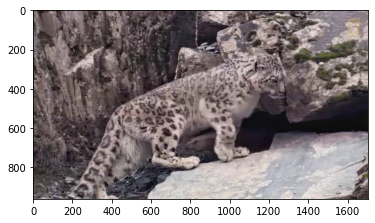

In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('sr.jpg')
imgplot = plt.imshow(img)
plt.show()


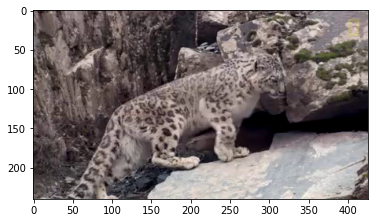

In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('./frames_lr/frame0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
!ls

gen_model500.h5  hr.jpg  __pycache__  sample_data  sr.jpg  Utils_model.py


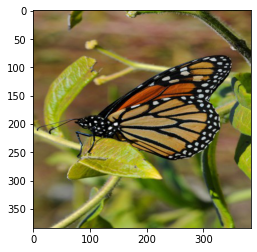

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('hr.jpg')
imgplot = plt.imshow(img)
plt.show()
